# Imports

In [ ]:
# General Imports
import numpy as np
import pandas as pd
import math
import pickle
import os

# Plot
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

# Dates
import datetime as dt
from datetime import timedelta

# Preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# Clustering
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer
from yellowbrick.cluster import SilhouetteVisualizer

# PCA
from sklearn.decomposition import PCA
from matplotlib.patches import Circle

import warnings
warnings.simplefilter(action = 'ignore')

# Sommaire
!pip install jyquickhelper
from jyquickhelper import add_notebook_menu # attention, ne prend que les titres de niveau 2
add_notebook_menu()

In [ ]:
# Set display preferences
pd.set_option('display.max_row', 250)
pd.set_option('display.max_column', 100)
pd.set_option('display.precision', 5)

In [ ]:
# à run pour colab uniquement
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Modèles à tester :

# - Kmeans
# - Agglomerative clustering
# - DBSCAN
# - Spectral clustering

In [ ]:
# Evaluation du clustering

# - forme des clusters (cf silhouette score)
# - stabilité des clusters (ARI score)

In [ ]:
# Métriques d'évalutation :

# - Silhouette score/coefficient
# - Davies-Bouldin Index
# - Calinski-Harabasz Index
# - Adjusted Rand Index

# ne choisir qu'une métrique et se baser dessus
# si j'en prends trop, peuvent dire des choses différentes et ne va m'avancer à rien

# Données RFM - Kmeans

In [ ]:
# import des données - dataset rfm

# Chemin d'accès aux données (à modifier si code en local)
path = '/content/drive/MyDrive/OpenClassrooms/Projet5/' #-> pour colab
#path = '' #-> en local

filepath = os.path.join(path, 'df_rfm')

with open(filepath, 'rb') as f:
    df_rfm = pickle.load(f)

df_rfm.head()

,Recency,Frequency,Monetary,Segment
0,293.0,0.69315,4.50866,Hibernating
1,414.0,0.69315,4.02356,Hibernating
2,552.0,0.69315,5.19844,Hibernating
3,383.0,0.69315,5.01662,Hibernating
4,154.0,0.69315,4.54329,Promising


In [ ]:
df_rfm_test = df_rfm[['Recency', 'Frequency', 'Monetary']]

In [ ]:
df_rfm_test.isna().sum()

Recency      625
Frequency      0
Monetary       0
dtype: int64

In [ ]:
df_rfm_test.dropna(inplace = True)

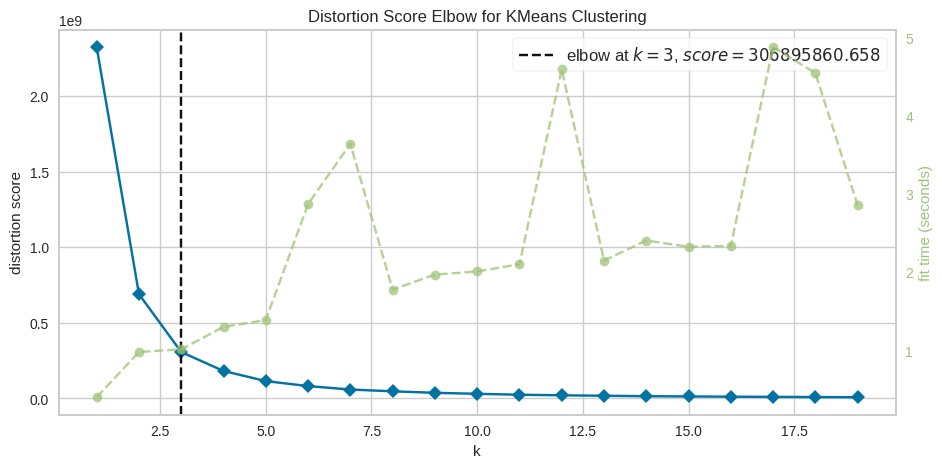

CPU times: user 53.8 s, sys: 18.7 s, total: 1min 12s
Wall time: 46.8 s


<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
%%time
# autre méthode
#!pip install yellowbrick


# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k = (1, 20), size = (1080, 500))

visualizer.fit(df_rfm_test)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

## Clustering

In [ ]:
%%time

model = KMeans(n_clusters = 3)

model.fit(df_rfm_test)
# model.labels_ ou
model.predict(df_rfm_test)
labels = model.predict(df_rfm_test)
centroids = model.cluster_centers_

# visualiser
#plt.scatter(X[:,0], X[:,1], c = model.predict(X))

CPU times: user 1.44 s, sys: 670 ms, total: 2.11 s
Wall time: 1.11 s


In [ ]:
df_rfm_test['cluster_num'] = model.labels_
df_rfm_test.head()

,Recency,Frequency,Monetary,cluster_num
0,293.0,0.69315,4.50866,2
1,414.0,0.69315,4.02356,1
2,552.0,0.69315,5.19844,1
3,383.0,0.69315,5.01662,1
4,154.0,0.69315,4.54329,0


In [ ]:
df_rfm_test.groupby('cluster_num').mean()

,Recency,Frequency,Monetary
cluster_num,,,
0,92.80700,0.75807,4.54010
1,464.06158,0.76497,4.48053
2,260.89162,0.76225,4.49977


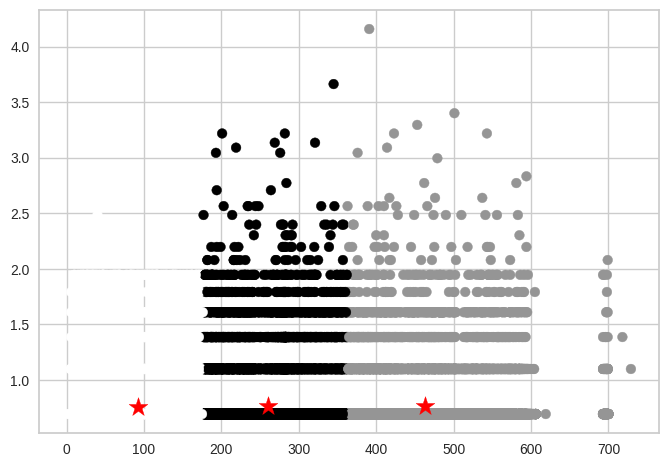

In [ ]:
# display the clusters
plt.scatter(df_rfm_test['Recency'], df_rfm_test['Frequency'], c = model.labels_)

# display the clusters centers
plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1], marker="*", s=200, c='red')

plt.show()

In [ ]:
# countplot to check the number of clusters and number of customers in each cluster
#sns.countplot(labels)            # nul, à refaire

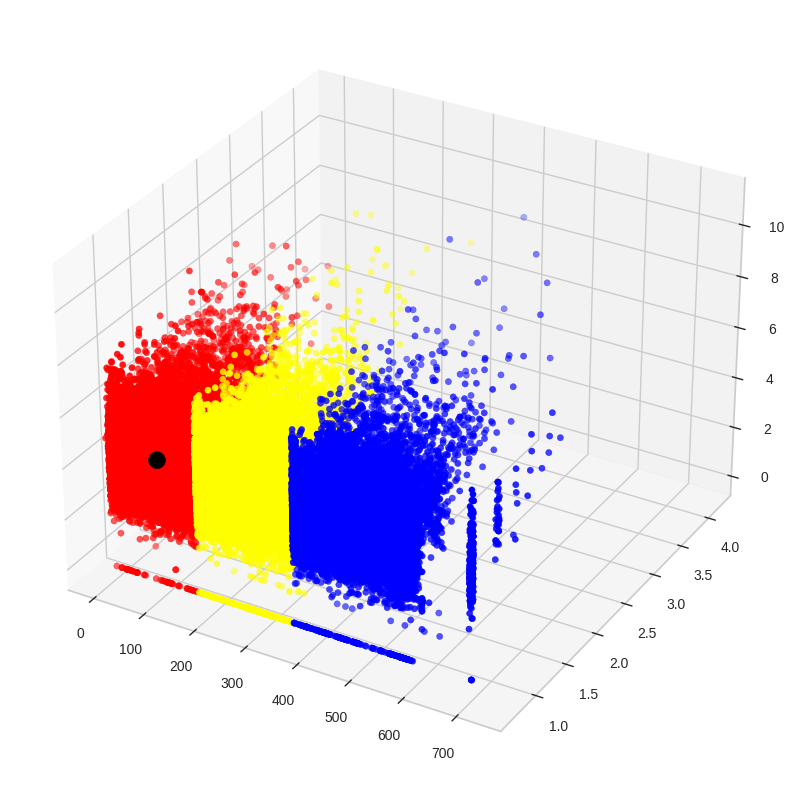

In [ ]:
# 3d-plot

fig = plt.figure(figsize = (20, 10))
ax = fig.add_subplot(111, projection = '3d')

x = np.array(labels == 0)
y = np.array(labels == 1)
z = np.array(labels == 2)

ax.scatter(df_rfm_test[x]['Recency'], df_rfm_test[x]['Frequency'], df_rfm_test[x]['Monetary'], color = 'red')
ax.scatter(df_rfm_test[y]['Recency'], df_rfm_test[y]['Frequency'], df_rfm_test[y]['Monetary'], color = 'blue')
ax.scatter(df_rfm_test[z]['Recency'], df_rfm_test[z]['Frequency'], df_rfm_test[z]['Monetary'], color = 'yellow')
ax.scatter(centroids[:, 0], centroids[:, 1], centroids[:, 2], c = 'black', s = 150, label = 'Center', alpha = 1)

In [ ]:
# eclatax